# Import & config

In [1]:
%load_ext autoreload
%autoreload 2
import os
os.chdir('C:\\Users\\Usuario\\TFG\\digipanca\\')

In [2]:
import torch
from scripts.neweval import evaluate_model_on_patients, load_trained_model
from src.utils.config import load_config

# __2D__

## __Load model__

In [4]:
config = load_config('configs/experiments/deep_aug_5.yaml')
model_path = 'experiments/deep_aug/deep_aug_20250415_215856/checkpoints/best_model_epoch60.pth'
model = load_trained_model(config, model_path)

In [5]:
config_device = config['training']['device']
device = torch.device(config_device if torch.cuda.is_available() else "cpu")

In [6]:
model.to(device);

## __Evaluate__

In [7]:
output_dir='experiments'
evaluate_model_on_patients(model, config, output_dir, device)

Evaluating patients:   0%|                                                                                                           | 0/2 [00:00<?, ?it/s]

📊 Loading dataset... 68 slices found.



%|                                                                                                                               | 0/17 [00:00<?, ?it/s]
%|███████                                                                                                                | 1/17 [00:05<01:31,  5.72s/it]
%|██████████████                                                                                                         | 2/17 [00:08<00:56,  3.75s/it]
%|█████████████████████                                                                                                  | 3/17 [00:10<00:44,  3.17s/it]
%|████████████████████████████                                                                                           | 4/17 [00:12<00:35,  2.75s/it]
%|███████████████████████████████████                                                                                    | 5/17 [00:14<00:29,  2.49s/it]
%|██████████████████████████████████████████                                     

Metrics:
{'dice_class_1': 0.7625184655189514, 'dice_class_2': 0.7572513818740845, 'dice_class_3': 0.8611764907836914, 'dice_class_4': 0.8387076258659363, 'iou_class_1': 0.6396302580833435, 'iou_class_2': 0.6762517094612122, 'iou_class_3': 0.777618944644928, 'iou_class_4': 0.7503553032875061, 'precision_class_1': 0.7493792176246643, 'precision_class_2': 0.7242211103439331, 'precision_class_3': 0.8600673675537109, 'precision_class_4': 0.8662409782409668, 'recall_class_1': 0.8151559829711914, 'recall_class_2': 0.8007930517196655, 'recall_class_3': 0.8697893619537354, 'recall_class_4': 0.8324248790740967, 'dice': 0.8049135208129883, 'iou': 0.710964024066925, 'precision': 0.79997718334198, 'recall': 0.8295407891273499}
CM:
{'tp_class_1': 23022.0, 'tp_class_2': 26292.0, 'tp_class_3': 44433.0, 'tp_class_4': 59479.0, 'fp_class_1': 6288.0, 'fp_class_2': 4514.0, 'fp_class_3': 6891.0, 'fp_class_4': 7698.0, 'fn_class_1': 3342.0, 'fn_class_2': 1997.0, 'fn_class_3': 5438.0, 'fn_class_4': 6304.0, 'tn


%|                                                                                                                               | 0/23 [00:00<?, ?it/s]
%|█████▏                                                                                                                 | 1/23 [00:06<02:20,  6.40s/it]
%|██████████▎                                                                                                            | 2/23 [00:08<01:25,  4.08s/it]
%|███████████████▌                                                                                                       | 3/23 [00:11<01:08,  3.40s/it]
%|████████████████████▋                                                                                                  | 4/23 [00:13<00:57,  3.00s/it]
%|█████████████████████████▊                                                                                             | 5/23 [00:16<00:50,  2.81s/it]
%|███████████████████████████████                                                

Metrics:
{'dice_class_1': 0.5236563682556152, 'dice_class_2': 0.0, 'dice_class_3': 0.709119439125061, 'dice_class_4': 0.6351971626281738, 'iou_class_1': 0.3896583020687103, 'iou_class_2': 0.0, 'iou_class_3': 0.5822878479957581, 'iou_class_4': 0.5286328196525574, 'precision_class_1': 0.4861314296722412, 'precision_class_2': 0.0, 'precision_class_3': 0.632434606552124, 'precision_class_4': 0.6482743620872498, 'recall_class_1': 0.7016118168830872, 'recall_class_2': 0.0, 'recall_class_3': 0.8432402014732361, 'recall_class_4': 0.6683187484741211, 'dice': 0.4669932425022125, 'iou': 0.37514472007751465, 'precision': 0.44171011447906494, 'recall': 0.5532926917076111}
CM:
{'tp_class_1': 21799.0, 'tp_class_2': 0.0, 'tp_class_3': 36232.0, 'tp_class_4': 40954.0, 'fp_class_1': 17586.0, 'fp_class_2': 69.0, 'fp_class_3': 19463.0, 'fp_class_4': 17450.0, 'fn_class_1': 7515.0, 'fn_class_2': 3250.0, 'fn_class_3': 4980.0, 'fn_class_4': 12032.0, 'tn_class_1': 5916876.0, 'tn_class_2': 5960457.0, 'tn_class_3

## __Evaluate val split__

### __New func__

In [26]:
import csv
from tqdm.notebook import tqdm
from src.data.dataset2d import PancreasDataset2D
from src.metrics.sma import SegmentationMetricsAccumulator as SMA
from src.training.setup.transforms_factory import get_transforms
from src.training.setup.dataset_factory import get_dataset
from torch.utils.data import DataLoader

def evaluate_model_on_patients_train(model, config, output_dir, device):
    """
    """
    model.to(device)
    model.eval()

    # Get patient IDs
    data_dir = os.path.join(config["data"]["processed_dir"], "train")
    patient_ids = [
        "rtum79",
        "rtum1",
        "rtum33",
        "rtum3",
        "rtum20",
        "rtum70",
        "rtum19",
        "rtum26",
        "rtum13",
        "rtum71",
        "rtum87",
        "rtum69",
        "rtum58",
        "rtum82",
        "rtum86",
        "rtum68",
        "rtum4",
        "rtum81"
    ]

    # Get the transforms
    transform = get_transforms(config)

    # Create metrics accumulator
    sma = SMA(include_background=False)

    csv_file = os.path.join(output_dir, "evaluation.csv")

    with open(csv_file, mode="w", newline="") as file:
        writer = csv.writer(file)
        writer.writerow(['patient_id', 'dice', 'tp', 'fp', 'fn'])

        loop = tqdm(
            patient_ids,
            colour="red",
            leave=True
        )
        loop.set_description(f"Evaluating patients")

        for pid in loop:
            p_dataset = PancreasDataset2D(
                data_dir=data_dir,
                transform=transform,
                load_into_memory=False,
                patient_ids=[pid]
            );

            # Create DataLoader
            p_dl = DataLoader(
                p_dataset,
                batch_size=config['data']['batch_size'],
                shuffle=False,
                num_workers=config['data']['num_workers'],
                pin_memory=True
            )

            # Evaluate
            patient_loop = tqdm(
                p_dl,
                leave=True,
                colour="blue"
            )
            patient_loop.set_description(f"Patient {pid}")

            with torch.no_grad():
                for images, masks, _ in patient_loop:
                    images, masks = images.to(device), masks.to(device)

                    outputs = model(images)
                    
                    if isinstance(outputs, dict):
                        outputs = outputs["out"]

                    # Update metrics
                    _ = sma.update(outputs, masks)

                # Get aggregated scores and confusion matrix
                p_metrics = sma.aggregate()
                p_cm = sma.aggregate_global_cm()

                sma.reset() # Reset accumulator

                # Save results
                writer.writerow([
                    pid,
                    p_metrics['dice'],
                    p_cm['tp'],
                    p_cm['fp'],
                    p_cm['fn']
                ])

                tqdm.write(f"Metrics:\n{p_metrics}")
                tqdm.write(f"CM:\n{p_cm}")

        print("Evaluation finished.")
        print(f"Results file: {csv_file}")

### Evaluate

In [27]:
evaluate_model_on_patients_train(model, config, output_dir, device)

  0%|          | 0/18 [00:00<?, ?it/s]

📊 Loading dataset... 103 slices found.


  0%|          | 0/26 [00:00<?, ?it/s]

Metrics:
{'dice_class_1': 0.5324310660362244, 'dice_class_2': 0.2273699939250946, 'dice_class_3': 0.8012505769729614, 'dice_class_4': 0.6751064658164978, 'iou_class_1': 0.45153653621673584, 'iou_class_2': 0.156370609998703, 'iou_class_3': 0.7064030170440674, 'iou_class_4': 0.5607652068138123, 'precision_class_1': 0.6438092589378357, 'precision_class_2': 0.168614000082016, 'precision_class_3': 0.8756927847862244, 'precision_class_4': 0.7729638814926147, 'recall_class_1': 0.4964034855365753, 'recall_class_2': 0.379624605178833, 'recall_class_3': 0.7697128653526306, 'recall_class_4': 0.6122469902038574, 'dice': 0.5590395331382751, 'iou': 0.468768835067749, 'precision': 0.6152700185775757, 'recall': 0.5644969940185547}
CM:
{'tp_class_1': 43973.0, 'tp_class_2': 2534.0, 'tp_class_3': 30782.0, 'tp_class_4': 38452.0, 'fp_class_1': 5177.0, 'fp_class_2': 6220.0, 'fp_class_3': 3569.0, 'fp_class_4': 5826.0, 'fn_class_1': 13667.0, 'fn_class_2': 1389.0, 'fn_class_3': 8133.0, 'fn_class_4': 16632.0, '

  0%|          | 0/23 [00:00<?, ?it/s]

Metrics:
{'dice_class_1': 0.5236563682556152, 'dice_class_2': 0.0, 'dice_class_3': 0.709119439125061, 'dice_class_4': 0.6351971626281738, 'iou_class_1': 0.3896583020687103, 'iou_class_2': 0.0, 'iou_class_3': 0.5822878479957581, 'iou_class_4': 0.5286328196525574, 'precision_class_1': 0.4861314296722412, 'precision_class_2': 0.0, 'precision_class_3': 0.632434606552124, 'precision_class_4': 0.6482743620872498, 'recall_class_1': 0.7016118168830872, 'recall_class_2': 0.0, 'recall_class_3': 0.8432402014732361, 'recall_class_4': 0.6683187484741211, 'dice': 0.4669932425022125, 'iou': 0.37514472007751465, 'precision': 0.44171011447906494, 'recall': 0.5532926917076111}
CM:
{'tp_class_1': 21799.0, 'tp_class_2': 0.0, 'tp_class_3': 36232.0, 'tp_class_4': 40954.0, 'fp_class_1': 17586.0, 'fp_class_2': 69.0, 'fp_class_3': 19463.0, 'fp_class_4': 17450.0, 'fn_class_1': 7515.0, 'fn_class_2': 3250.0, 'fn_class_3': 4980.0, 'fn_class_4': 12032.0, 'tn_class_1': 5916876.0, 'tn_class_2': 5960457.0, 'tn_class_3

  0%|          | 0/27 [00:00<?, ?it/s]

Metrics:
{'dice_class_1': 0.5854917168617249, 'dice_class_2': 0.45624417066574097, 'dice_class_3': 0.7391084432601929, 'dice_class_4': 0.6814630627632141, 'iou_class_1': 0.473090797662735, 'iou_class_2': 0.372770220041275, 'iou_class_3': 0.6271844506263733, 'iou_class_4': 0.6068173050880432, 'precision_class_1': 0.615749180316925, 'precision_class_2': 0.4048323333263397, 'precision_class_3': 0.7437217831611633, 'precision_class_4': 0.6853890419006348, 'recall_class_1': 0.5992693305015564, 'recall_class_2': 0.5311872363090515, 'recall_class_3': 0.7664603590965271, 'recall_class_4': 0.713952362537384, 'dice': 0.6155768632888794, 'iou': 0.5199657082557678, 'precision': 0.6124230623245239, 'recall': 0.6527172923088074}
CM:
{'tp_class_1': 39196.0, 'tp_class_2': 6142.0, 'tp_class_3': 33309.0, 'tp_class_4': 71579.0, 'fp_class_1': 18211.0, 'fp_class_2': 2887.0, 'fp_class_3': 8505.0, 'fp_class_4': 12954.0, 'fn_class_1': 11882.0, 'fn_class_2': 1405.0, 'fn_class_3': 8851.0, 'fn_class_4': 10973.0,

  0%|          | 0/28 [00:00<?, ?it/s]

Metrics:
{'dice_class_1': 0.737269937992096, 'dice_class_2': 0.3991365134716034, 'dice_class_3': 0.7743552923202515, 'dice_class_4': 0.5786775946617126, 'iou_class_1': 0.6150245070457458, 'iou_class_2': 0.29839766025543213, 'iou_class_3': 0.6929755806922913, 'iou_class_4': 0.47293952107429504, 'precision_class_1': 0.7116045951843262, 'precision_class_2': 0.4838167726993561, 'precision_class_3': 0.7881520986557007, 'precision_class_4': 0.6682013273239136, 'recall_class_1': 0.774658203125, 'recall_class_2': 0.4337109625339508, 'recall_class_3': 0.7745669484138489, 'recall_class_4': 0.58157879114151, 'dice': 0.6223598122596741, 'iou': 0.5198343396186829, 'precision': 0.6629437208175659, 'recall': 0.6411287188529968}
CM:
{'tp_class_1': 74104.0, 'tp_class_2': 9292.0, 'tp_class_3': 66423.0, 'tp_class_4': 71819.0, 'fp_class_1': 23361.0, 'fp_class_2': 6077.0, 'fp_class_3': 14204.0, 'fp_class_4': 21677.0, 'fn_class_1': 13433.0, 'fn_class_2': 6931.0, 'fn_class_3': 10411.0, 'fn_class_4': 33227.0,

  0%|          | 0/11 [00:00<?, ?it/s]

Metrics:
{'dice_class_1': 0.4662582576274872, 'dice_class_2': 0.27848413586616516, 'dice_class_3': 0.7978716492652893, 'dice_class_4': 0.7501775026321411, 'iou_class_1': 0.36894598603248596, 'iou_class_2': 0.19553488492965698, 'iou_class_3': 0.7078738808631897, 'iou_class_4': 0.6484783887863159, 'precision_class_1': 0.4056418240070343, 'precision_class_2': 0.5167338252067566, 'precision_class_3': 0.8247665762901306, 'precision_class_4': 0.7362348437309265, 'recall_class_1': 0.6022980809211731, 'recall_class_2': 0.2186366617679596, 'recall_class_3': 0.7904783487319946, 'recall_class_4': 0.801792323589325, 'dice': 0.5731978416442871, 'iou': 0.48020830750465393, 'precision': 0.620844304561615, 'recall': 0.6033013463020325}
CM:
{'tp_class_1': 14352.0, 'tp_class_2': 1685.0, 'tp_class_3': 15732.0, 'tp_class_4': 24621.0, 'fp_class_1': 12573.0, 'fp_class_2': 470.0, 'fp_class_3': 3150.0, 'fp_class_4': 6020.0, 'fn_class_1': 2277.0, 'fn_class_2': 4170.0, 'fn_class_3': 3497.0, 'fn_class_4': 4619.0

  0%|          | 0/27 [00:00<?, ?it/s]

Metrics:
{'dice_class_1': 0.3694932162761688, 'dice_class_2': 0.0, 'dice_class_3': 0.7319572567939758, 'dice_class_4': 0.652591347694397, 'iou_class_1': 0.2798043489456177, 'iou_class_2': 0.0, 'iou_class_3': 0.6344013810157776, 'iou_class_4': 0.550952672958374, 'precision_class_1': 0.3992830514907837, 'precision_class_2': 0.0, 'precision_class_3': 0.7553055882453918, 'precision_class_4': 0.7413482069969177, 'recall_class_1': 0.5128952264785767, 'recall_class_2': 0.0, 'recall_class_3': 0.7463092803955078, 'recall_class_4': 0.6092408895492554, 'dice': 0.4385104477405548, 'iou': 0.3662896156311035, 'precision': 0.4739842414855957, 'recall': 0.46711134910583496}
CM:
{'tp_class_1': 10326.0, 'tp_class_2': 0.0, 'tp_class_3': 29314.0, 'tp_class_4': 35506.0, 'fp_class_1': 10190.0, 'fp_class_2': 0.0, 'fp_class_3': 7010.0, 'fp_class_4': 5293.0, 'fn_class_1': 5637.0, 'fn_class_2': 5535.0, 'fn_class_3': 6977.0, 'fn_class_4': 16643.0, 'tn_class_1': 7051735.0, 'tn_class_2': 7072353.0, 'tn_class_3': 7

  0%|          | 0/23 [00:00<?, ?it/s]

Metrics:
{'dice_class_1': 0.6217330694198608, 'dice_class_2': 0.0, 'dice_class_3': 0.6678003072738647, 'dice_class_4': 0.559670627117157, 'iou_class_1': 0.4956085681915283, 'iou_class_2': 0.0, 'iou_class_3': 0.5706889033317566, 'iou_class_4': 0.4648563861846924, 'precision_class_1': 0.6011606454849243, 'precision_class_2': 0.0, 'precision_class_3': 0.7018671631813049, 'precision_class_4': 0.5388196110725403, 'recall_class_1': 0.7115925550460815, 'recall_class_2': 0.0, 'recall_class_3': 0.6836596131324768, 'recall_class_4': 0.6098453402519226, 'dice': 0.46230101585388184, 'iou': 0.3827884793281555, 'precision': 0.4604618549346924, 'recall': 0.5012744069099426}
CM:
{'tp_class_1': 32049.0, 'tp_class_2': 0.0, 'tp_class_3': 33730.0, 'tp_class_4': 35857.0, 'fp_class_1': 20814.0, 'fp_class_2': 0.0, 'fp_class_3': 12436.0, 'fp_class_4': 15873.0, 'fn_class_1': 7540.0, 'fn_class_2': 9999.0, 'fn_class_3': 9900.0, 'fn_class_4': 7471.0, 'tn_class_1': 5903373.0, 'tn_class_2': 5953777.0, 'tn_class_3':

  0%|          | 0/29 [00:00<?, ?it/s]

Metrics:
{'dice_class_1': 0.8215036392211914, 'dice_class_2': 0.7264865040779114, 'dice_class_3': 0.8568082451820374, 'dice_class_4': 0.80458664894104, 'iou_class_1': 0.7195876240730286, 'iou_class_2': 0.6341471672058105, 'iou_class_3': 0.773143470287323, 'iou_class_4': 0.7140272855758667, 'precision_class_1': 0.8199902772903442, 'precision_class_2': 0.6932900547981262, 'precision_class_3': 0.8820826411247253, 'precision_class_4': 0.7874523401260376, 'recall_class_1': 0.8324242234230042, 'recall_class_2': 0.7809209227561951, 'recall_class_3': 0.8434012532234192, 'recall_class_4': 0.8307123184204102, 'dice': 0.8023462295532227, 'iou': 0.7102264165878296, 'precision': 0.7957038879394531, 'recall': 0.821864664554596}
CM:
{'tp_class_1': 89610.0, 'tp_class_2': 20236.0, 'tp_class_3': 65869.0, 'tp_class_4': 62681.0, 'fp_class_1': 13828.0, 'fp_class_2': 3633.0, 'fp_class_3': 5805.0, 'fp_class_4': 10073.0, 'fn_class_1': 10678.0, 'fn_class_2': 2087.0, 'fn_class_3': 11208.0, 'fn_class_4': 7918.0,

  0%|          | 0/17 [00:00<?, ?it/s]

Metrics:
{'dice_class_1': 0.7770340442657471, 'dice_class_2': 0.0, 'dice_class_3': 0.71616530418396, 'dice_class_4': 0.7057995796203613, 'iou_class_1': 0.6811612844467163, 'iou_class_2': 0.0, 'iou_class_3': 0.6311028003692627, 'iou_class_4': 0.6035266518592834, 'precision_class_1': 0.7574213147163391, 'precision_class_2': 0.0, 'precision_class_3': 0.7290328145027161, 'precision_class_4': 0.7182711362838745, 'recall_class_1': 0.8164241313934326, 'recall_class_2': 0.0, 'recall_class_3': 0.7148502469062805, 'recall_class_4': 0.7299097180366516, 'dice': 0.5497497320175171, 'iou': 0.4789476990699768, 'precision': 0.5511813163757324, 'recall': 0.5652959942817688}
CM:
{'tp_class_1': 28636.0, 'tp_class_2': 0.0, 'tp_class_3': 16290.0, 'tp_class_4': 18155.0, 'fp_class_1': 5601.0, 'fp_class_2': 0.0, 'fp_class_3': 4191.0, 'fp_class_4': 4010.0, 'fn_class_1': 3800.0, 'fn_class_2': 789.0, 'fn_class_3': 2893.0, 'fn_class_4': 4639.0, 'tn_class_1': 4352875.0, 'tn_class_2': 4390123.0, 'tn_class_3': 43675

  0%|          | 0/31 [00:00<?, ?it/s]

Metrics:
{'dice_class_1': 0.711707353591919, 'dice_class_2': 0.0, 'dice_class_3': 0.8097440004348755, 'dice_class_4': 0.5885242223739624, 'iou_class_1': 0.5987081527709961, 'iou_class_2': 0.0, 'iou_class_3': 0.7102940678596497, 'iou_class_4': 0.4929218888282776, 'precision_class_1': 0.7007062435150146, 'precision_class_2': 0.0, 'precision_class_3': 0.843492329120636, 'precision_class_4': 0.6039957404136658, 'recall_class_1': 0.7718799710273743, 'recall_class_2': 0.0, 'recall_class_3': 0.8069477677345276, 'recall_class_4': 0.6317312121391296, 'dice': 0.5274938941001892, 'iou': 0.45048099756240845, 'precision': 0.5370485782623291, 'recall': 0.5526397228240967}
CM:
{'tp_class_1': 89450.0, 'tp_class_2': 0.0, 'tp_class_3': 64259.0, 'tp_class_4': 70880.0, 'fp_class_1': 25557.0, 'fp_class_2': 91.0, 'fp_class_3': 11366.0, 'fp_class_4': 25674.0, 'fn_class_1': 19049.0, 'fn_class_2': 10723.0, 'fn_class_3': 12492.0, 'fn_class_4': 22049.0, 'tn_class_1': 7795800.0, 'tn_class_2': 7919042.0, 'tn_class

  0%|          | 0/30 [00:00<?, ?it/s]

Metrics:
{'dice_class_1': 0.6003732681274414, 'dice_class_2': 0.0, 'dice_class_3': 0.76705402135849, 'dice_class_4': 0.6852254271507263, 'iou_class_1': 0.48590514063835144, 'iou_class_2': 0.0, 'iou_class_3': 0.6751188635826111, 'iou_class_4': 0.5915839076042175, 'precision_class_1': 0.6713739633560181, 'precision_class_2': 0.0, 'precision_class_3': 0.782362163066864, 'precision_class_4': 0.6574146747589111, 'recall_class_1': 0.6109734177589417, 'recall_class_2': 0.0, 'recall_class_3': 0.7766398191452026, 'recall_class_4': 0.7677130699157715, 'dice': 0.5131632089614868, 'iou': 0.4381519556045532, 'precision': 0.5277876853942871, 'recall': 0.5388315916061401}
CM:
{'tp_class_1': 96636.0, 'tp_class_2': 0.0, 'tp_class_3': 46119.0, 'tp_class_4': 78910.0, 'fp_class_1': 25869.0, 'fp_class_2': 2127.0, 'fp_class_3': 12569.0, 'fp_class_4': 24698.0, 'fn_class_1': 32875.0, 'fn_class_2': 3130.0, 'fn_class_3': 9615.0, 'fn_class_4': 10763.0, 'tn_class_1': 7708940.0, 'tn_class_2': 7859063.0, 'tn_class_

  0%|          | 0/29 [00:00<?, ?it/s]

Metrics:
{'dice_class_1': 0.6956596970558167, 'dice_class_2': 0.11576657742261887, 'dice_class_3': 0.7766215205192566, 'dice_class_4': 0.595598042011261, 'iou_class_1': 0.6024079322814941, 'iou_class_2': 0.07106567174196243, 'iou_class_3': 0.6947451233863831, 'iou_class_4': 0.4822912812232971, 'precision_class_1': 0.7136522531509399, 'precision_class_2': 0.10947535187005997, 'precision_class_3': 0.830017626285553, 'precision_class_4': 0.6418963074684143, 'recall_class_1': 0.696122944355011, 'recall_class_2': 0.2368239164352417, 'recall_class_3': 0.7382214665412903, 'recall_class_4': 0.6233352422714233, 'dice': 0.545911431312561, 'iou': 0.46262747049331665, 'precision': 0.5737603902816772, 'recall': 0.573625922203064}
CM:
{'tp_class_1': 97806.0, 'tp_class_2': 420.0, 'tp_class_3': 50326.0, 'tp_class_4': 56457.0, 'fp_class_1': 15816.0, 'fp_class_2': 1704.0, 'fp_class_3': 7846.0, 'fp_class_4': 14602.0, 'fn_class_1': 18801.0, 'fn_class_2': 2615.0, 'fn_class_3': 10059.0, 'fn_class_4': 17104.

  0%|          | 0/25 [00:00<?, ?it/s]

Metrics:
{'dice_class_1': 0.39894193410873413, 'dice_class_2': 0.19901958107948303, 'dice_class_3': 0.816072940826416, 'dice_class_4': 0.676875114440918, 'iou_class_1': 0.3082738518714905, 'iou_class_2': 0.14251138269901276, 'iou_class_3': 0.738190770149231, 'iou_class_4': 0.5816602110862732, 'precision_class_1': 0.38720113039016724, 'precision_class_2': 0.3952581286430359, 'precision_class_3': 0.8123928904533386, 'precision_class_4': 0.6428436040878296, 'recall_class_1': 0.6256695985794067, 'recall_class_2': 0.1518780142068863, 'recall_class_3': 0.837178647518158, 'recall_class_4': 0.7665128111839294, 'dice': 0.522727370262146, 'iou': 0.44265908002853394, 'precision': 0.5594239234924316, 'recall': 0.5953097939491272}
CM:
{'tp_class_1': 15642.0, 'tp_class_2': 3544.0, 'tp_class_3': 63644.0, 'tp_class_4': 68937.0, 'fp_class_1': 22569.0, 'fp_class_2': 395.0, 'fp_class_3': 11405.0, 'fp_class_4': 18934.0, 'fn_class_1': 6163.0, 'fn_class_2': 18039.0, 'fn_class_3': 8120.0, 'fn_class_4': 9597.

  0%|          | 0/27 [00:00<?, ?it/s]

Metrics:
{'dice_class_1': 0.6652842164039612, 'dice_class_2': 0.11309945583343506, 'dice_class_3': 0.8109580874443054, 'dice_class_4': 0.700649619102478, 'iou_class_1': 0.5522947311401367, 'iou_class_2': 0.07087951898574829, 'iou_class_3': 0.7131232023239136, 'iou_class_4': 0.6025631427764893, 'precision_class_1': 0.5937950611114502, 'precision_class_2': 0.35301893949508667, 'precision_class_3': 0.8192428946495056, 'precision_class_4': 0.6627910733222961, 'recall_class_1': 0.7887963056564331, 'recall_class_2': 0.07126259803771973, 'recall_class_3': 0.8496608734130859, 'recall_class_4': 0.7845849990844727, 'dice': 0.5724978446960449, 'iou': 0.48471516370773315, 'precision': 0.6072120070457458, 'recall': 0.6235761642456055}
CM:
{'tp_class_1': 51718.0, 'tp_class_2': 1528.0, 'tp_class_3': 37636.0, 'tp_class_4': 55404.0, 'fp_class_1': 22634.0, 'fp_class_2': 29.0, 'fp_class_3': 7603.0, 'fp_class_4': 18168.0, 'fn_class_1': 4440.0, 'fn_class_2': 10865.0, 'fn_class_3': 6973.0, 'fn_class_4': 859

  0%|          | 0/34 [00:00<?, ?it/s]

Metrics:
{'dice_class_1': 0.6585181355476379, 'dice_class_2': 0.19218282401561737, 'dice_class_3': 0.6923326253890991, 'dice_class_4': 0.6449039578437805, 'iou_class_1': 0.5310901403427124, 'iou_class_2': 0.15090703964233398, 'iou_class_3': 0.5885528326034546, 'iou_class_4': 0.5286459922790527, 'precision_class_1': 0.7669432759284973, 'precision_class_2': 0.2842172384262085, 'precision_class_3': 0.7117959856987, 'precision_class_4': 0.5774050951004028, 'recall_class_1': 0.6171619296073914, 'recall_class_2': 0.1850792020559311, 'recall_class_3': 0.6919748187065125, 'recall_class_4': 0.7950004935264587, 'dice': 0.5469843745231628, 'iou': 0.4497990012168884, 'precision': 0.5850903987884521, 'recall': 0.5723041296005249}
CM:
{'tp_class_1': 40272.0, 'tp_class_2': 2066.0, 'tp_class_3': 25649.0, 'tp_class_4': 32643.0, 'fp_class_1': 8047.0, 'fp_class_2': 2071.0, 'fp_class_3': 6892.0, 'fp_class_4': 17999.0, 'fn_class_1': 21112.0, 'fn_class_2': 4942.0, 'fn_class_3': 7222.0, 'fn_class_4': 4317.0,

  0%|          | 0/26 [00:00<?, ?it/s]

Metrics:
{'dice_class_1': 0.6983363628387451, 'dice_class_2': 0.20518101751804352, 'dice_class_3': 0.7880553603172302, 'dice_class_4': 0.6609143614768982, 'iou_class_1': 0.5818074941635132, 'iou_class_2': 0.15413755178451538, 'iou_class_3': 0.6969924569129944, 'iou_class_4': 0.5462438464164734, 'precision_class_1': 0.7488003373146057, 'precision_class_2': 0.19876617193222046, 'precision_class_3': 0.8115636110305786, 'precision_class_4': 0.6129509806632996, 'recall_class_1': 0.6975106596946716, 'recall_class_2': 0.2620030343532562, 'recall_class_3': 0.7887124419212341, 'recall_class_4': 0.7665206789970398, 'dice': 0.588121771812439, 'iou': 0.4947953224182129, 'precision': 0.5930202603340149, 'recall': 0.6286867260932922}
CM:
{'tp_class_1': 58385.0, 'tp_class_2': 1044.0, 'tp_class_3': 49396.0, 'tp_class_4': 49131.0, 'fp_class_1': 12732.0, 'fp_class_2': 2142.0, 'fp_class_3': 11782.0, 'fp_class_4': 24581.0, 'fn_class_1': 21176.0, 'fn_class_2': 1374.0, 'fn_class_3': 9395.0, 'fn_class_4': 91

  0%|          | 0/15 [00:00<?, ?it/s]

Metrics:
{'dice_class_1': 0.6414141058921814, 'dice_class_2': 0.34553831815719604, 'dice_class_3': 0.8154869079589844, 'dice_class_4': 0.688414990901947, 'iou_class_1': 0.5296925902366638, 'iou_class_2': 0.25667455792427063, 'iou_class_3': 0.7190366387367249, 'iou_class_4': 0.5664387941360474, 'precision_class_1': 0.6764262914657593, 'precision_class_2': 0.3105359375476837, 'precision_class_3': 0.8079297542572021, 'precision_class_4': 0.6542227268218994, 'recall_class_1': 0.6302453279495239, 'recall_class_2': 0.45497170090675354, 'recall_class_3': 0.8441023230552673, 'recall_class_4': 0.7463452816009521, 'dice': 0.622713565826416, 'iou': 0.5179606676101685, 'precision': 0.6122786998748779, 'recall': 0.6689161658287048}
CM:
{'tp_class_1': 37105.0, 'tp_class_2': 5726.0, 'tp_class_3': 51892.0, 'tp_class_4': 36170.0, 'fp_class_1': 9672.0, 'fp_class_2': 5068.0, 'fp_class_3': 10510.0, 'fp_class_4': 13420.0, 'fn_class_1': 12316.0, 'fn_class_2': 4490.0, 'fn_class_3': 8019.0, 'fn_class_4': 7619

  0%|          | 0/35 [00:00<?, ?it/s]

Metrics:
{'dice_class_1': 0.46550852060317993, 'dice_class_2': 0.2951747477054596, 'dice_class_3': 0.7202721238136292, 'dice_class_4': 0.6004524827003479, 'iou_class_1': 0.34752821922302246, 'iou_class_2': 0.23134692013263702, 'iou_class_3': 0.6336497068405151, 'iou_class_4': 0.48441919684410095, 'precision_class_1': 0.7187381982803345, 'precision_class_2': 0.36323466897010803, 'precision_class_3': 0.7317058444023132, 'precision_class_4': 0.7408893704414368, 'recall_class_1': 0.3978293538093567, 'recall_class_2': 0.25465673208236694, 'recall_class_3': 0.7446930408477783, 'recall_class_4': 0.5256384015083313, 'dice': 0.5203519463539124, 'iou': 0.4242360293865204, 'precision': 0.6386420130729675, 'recall': 0.4807043671607971}
CM:
{'tp_class_1': 68971.0, 'tp_class_2': 8002.0, 'tp_class_3': 46914.0, 'tp_class_4': 91747.0, 'fp_class_1': 11037.0, 'fp_class_2': 3461.0, 'fp_class_3': 15637.0, 'fp_class_4': 12383.0, 'fn_class_1': 103614.0, 'fn_class_2': 7778.0, 'fn_class_3': 8791.0, 'fn_class_4

# __3D__

## __Load trained model__

In [30]:
config_3d = load_config('configs/experiments/unet3d_4.yaml')
model_path_3d = 'experiments/unet3d/unet3d_20250423_064027/fold_1/checkpoints/best_model_epoch86.pth'
model_3d = load_trained_model(config_3d, model_path_3d)

In [31]:
config_device_3d = config_3d['training']['device']
device_3d = torch.device(config_device_3d if torch.cuda.is_available() else "cpu")

In [32]:
model_3d.to(device);

## __Function__

In [74]:
from src.data.dataset3d import PancreasDataset3D
import torch.nn.functional as F

def evaluate_3d(model, config, device, return_pred=False):
    model.to(device)
    model.eval()

    # Get patient IDs
    data_dir = os.path.join(config["data"]["processed_dir"], "train")
    patient_ids = [
        "rtum1"
    ]

    # Get the transforms
    transform = get_transforms(config)

    # Create metrics accumulator
    sma = SMA(include_background=False)

    loop = tqdm(
        patient_ids,
        colour="red",
        leave=True
    )
    loop.set_description(f"Evaluating patients")

    for pid in loop:
        p_dataset = PancreasDataset3D(
            data_dir=data_dir,
            transform=transform,
            load_into_memory=False,
            patient_ids=[pid]
        );

        # Create DataLoader
        p_dl = DataLoader(
            p_dataset,
            batch_size=config['data']['batch_size'],
            shuffle=False,
            num_workers=config['data']['num_workers'],
            pin_memory=True
        )

        # Evaluate
        patient_loop = tqdm(
            p_dl,
            leave=True,
            colour="blue"
        )
        patient_loop.set_description(f"Patient {pid}")

        all_preds = []
        all_slices = p_dataset.get_patient_subvolumes_slices(pid)
        D = all_slices[-1][1] + 1 # add 1 to the total number of slices
        
        with torch.no_grad():
            for images, masks, (_, slices) in patient_loop:
                images, masks = images.to(device), masks.to(device)

                outputs = model(images)
                
                if isinstance(outputs, dict):
                    outputs = outputs["out"]

                all_preds.append(F.softmax(outputs, dim=1))

            # Post-process
            all_preds = torch.cat(all_preds, dim=0)
            print(all_preds.shape)
            C, _, H, W = all_preds.shape[1:]
            sum_probs = torch.zeros((C, D, H, W), dtype=torch.float64)
            count = torch.zeros((D, H, W), dtype=torch.int8)

            for i, slices in enumerate(all_slices):
                start, end = slices
                sum_probs[:, start:end+1, :, :] += all_preds[i]
                count[start:end+1, :, :] += 1

            avg_probs = sum_probs / count.unsqueeze(0)
            pred_vol = avg_probs.unsqueeze(0) # B, C, D, H, W
            print(f"pred_vol shape: {pred_vol.shape}")
            recon_vol, recon_mask = p_dataset.get_patient_volume(pid)
            print(f"recon vol shape: {recon_vol.shape}")
            print(f"recon mask shape: {recon_mask.shape}")
            
            # Update metrics
            _ = sma.update(pred_vol, recon_mask)

            # Get aggregated scores and confusion matrix
            p_metrics = sma.aggregate()
            p_cm = sma.aggregate_global_cm()
            
            sma.reset() # Reset accumulator

            tqdm.write(f"Metrics:\n{p_metrics}")
            tqdm.write(f"CM:\n{p_cm}")
            tqdm.write('-'*65)

            if return_pred:
                return pred_vol

In [58]:
evaluate_3d(model_3d, config_3d, device_3d)

  0%|          | 0/1 [00:00<?, ?it/s]

📊 Loading dataset... 2 sub-volumes found.


  0%|          | 0/1 [00:00<?, ?it/s]

torch.Size([2, 5, 64, 256, 256])
pred_vol shape: torch.Size([1, 5, 91, 256, 256])
recon vol shape: torch.Size([1, 1, 91, 256, 256])
recon mask shape: torch.Size([1, 91, 256, 256])
Metrics:
{'dice_class_1': 0.7761029601097107, 'dice_class_2': 0.6096978187561035, 'dice_class_3': 0.8397595882415771, 'dice_class_4': 0.7756595611572266, 'iou_class_1': 0.6341243386268616, 'iou_class_2': 0.4385361969470978, 'iou_class_3': 0.7237806916236877, 'iou_class_4': 0.6335326433181763, 'precision_class_1': 0.6756852269172668, 'precision_class_2': 0.5611901879310608, 'precision_class_3': 0.8118982315063477, 'precision_class_4': 0.7118887305259705, 'recall_class_1': 0.9115780591964722, 'recall_class_2': 0.6673846244812012, 'recall_class_3': 0.8696010708808899, 'recall_class_4': 0.8519797921180725, 'dice': 0.7503049969673157, 'iou': 0.60749351978302, 'precision': 0.690165638923645, 'recall': 0.8251358866691589}
CM:
{'tp_class_1': 26722.0, 'tp_class_2': 2169.0, 'tp_class_3': 35838.0, 'tp_class_4': 45143.0,

# Plot

In [59]:
import numpy as np
from skimage import measure
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

In [60]:
CLASS_COLORS = {
    1: 'green',    # pancreas
    2: 'purple',   # tumor
    3: 'red',      # arteries
    4: 'blue',     # veins
}

In [61]:
def plot_segmentation_3d(segmentation, title=None, alpha=0.5):
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.set_box_aspect(segmentation.shape) 

    for cls, color in CLASS_COLORS.items():
        verts, faces, normals, values = measure.marching_cubes(
            segmentation == cls,
            level=0.5,
            spacing=(1.0, 1.0, 1.0)
        )
        mesh = Poly3DCollection(verts[faces], 
                                facecolor=color, 
                                edgecolor='none',
                                alpha=alpha)
        ax.add_collection3d(mesh)

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    if title:
        ax.set_title(title)
    # Adjust limits
    Z, Y, X = segmentation.shape
    ax.set_xlim(0, X)
    ax.set_ylim(0, Y)
    ax.set_zlim(0, Z)
    plt.tight_layout()
    plt.show()

In [72]:
def plot_segmentation_3d_v2(segmentation, title=None, alpha=0.5, spacing=(1.,1.,1.)):
    """
    Dibuja en 3D la superficie de cada clase de 'segmentation'.

    Parameters
    ----------
    segmentation : np.ndarray, shape (Z, Y, X)
        Volumen con valores enteros {0,1,2,3,4}.
    title : str, opcional
        Título de la figura.
    alpha : float
        Transparencia de las superficies.
    spacing : tuple de float
        Tamaño real de cada voxel en Z, Y, X (por si no son isotrópicos).
    """
    # Preparamos la figura
    fig = plt.figure(figsize=(8,8))
    ax  = fig.add_subplot(111, projection='3d')
    ax.set_box_aspect((segmentation.shape[2],
                       segmentation.shape[1],
                       segmentation.shape[0]))  # X, Y, Z

    # Para cada clase (1–4)
    for cls, color in CLASS_COLORS.items():
        mask = (segmentation == cls)
        if not mask.any():
            continue  # si no hay voxels, saltamos
        # marching_cubes exige float, y un nivel de corte
        verts, faces, normals, values = measure.marching_cubes(
            mask.astype(np.float32),
            level=0.5,
            spacing=spacing
        )
        # Ajuste de orientación: marching_cubes devuelve (z, y, x) en verts ordenado
        # y el box_aspect usa (X, Y, Z), pero normalmente no necesitas permutar aquí.

        mesh = Poly3DCollection(
            verts[faces],
            facecolor=color,
            edgecolor='none',
            alpha=alpha
        )
        ax.add_collection3d(mesh)

    # Ejes y título
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    if title:
        ax.set_title(title)
    # Límites
    Z, Y, X = segmentation.shape
    ax.set_xlim(0, X)
    ax.set_ylim(0, Y)
    ax.set_zlim(0, Z)
    plt.tight_layout()
    plt.show()

In [77]:
def test_plot(config, patient_id):
    data_dir = os.path.join(config["data"]["processed_dir"], "train")

    # Get the transforms
    transform = get_transforms(config)
    p_dataset = PancreasDataset3D(
        data_dir=data_dir,
        transform=transform,
        load_into_memory=False,
        patient_ids=[patient_id]
    );
    _, mask_recons = p_dataset.get_patient_volume(patient_id)
    mask_recons = mask_recons.squeeze(0)
    print(f"mask recons: {mask_recons.shape}")
    mask_np = mask_recons.detach().cpu().numpy()

    # plot_segmentation_3d(mask_np, title="Ground Truth")
    plot_segmentation_3d_v2(mask_np, title="Ground Truth", spacing=(1., 0.75, .75))

📊 Loading dataset... 2 sub-volumes found.
mask recons: torch.Size([91, 256, 256])


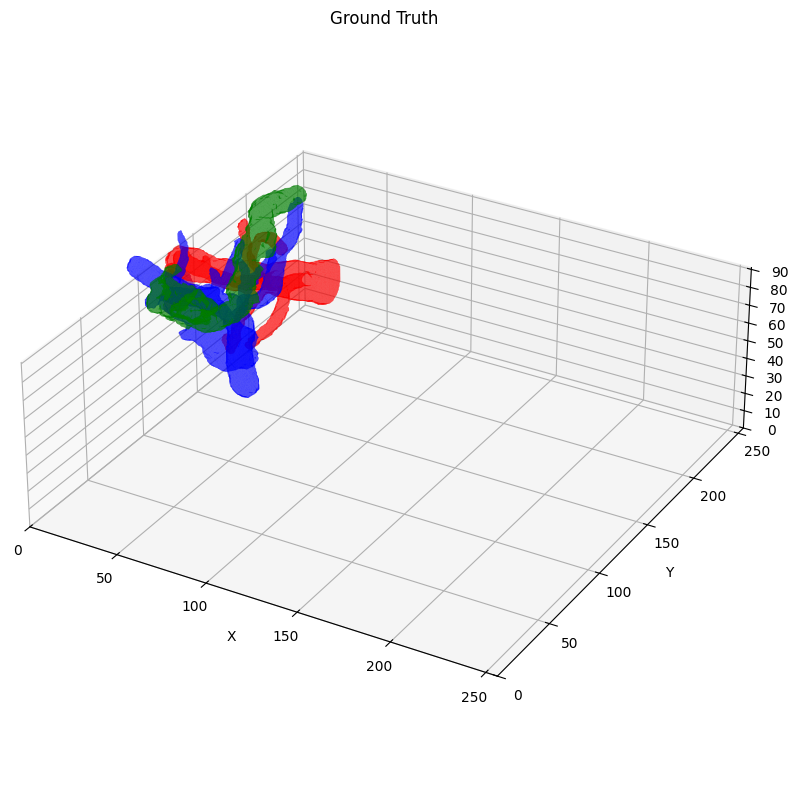

In [78]:
test_plot(config_3d, 'rtum1')

In [80]:
pred_3d_out = evaluate_3d(model_3d, config_3d, device_3d, return_pred=True)
print(pred_3d_out.shape)

  0%|          | 0/1 [00:00<?, ?it/s]

📊 Loading dataset... 2 sub-volumes found.


  0%|          | 0/1 [00:00<?, ?it/s]

torch.Size([2, 5, 64, 256, 256])
pred_vol shape: torch.Size([1, 5, 91, 256, 256])
recon vol shape: torch.Size([1, 1, 91, 256, 256])
recon mask shape: torch.Size([1, 91, 256, 256])
Metrics:
{'dice_class_1': 0.7761029601097107, 'dice_class_2': 0.6096978187561035, 'dice_class_3': 0.8397595882415771, 'dice_class_4': 0.7756595611572266, 'iou_class_1': 0.6341243386268616, 'iou_class_2': 0.4385361969470978, 'iou_class_3': 0.7237806916236877, 'iou_class_4': 0.6335326433181763, 'precision_class_1': 0.6756852269172668, 'precision_class_2': 0.5611901879310608, 'precision_class_3': 0.8118982315063477, 'precision_class_4': 0.7118887305259705, 'recall_class_1': 0.9115780591964722, 'recall_class_2': 0.6673846244812012, 'recall_class_3': 0.8696010708808899, 'recall_class_4': 0.8519797921180725, 'dice': 0.7503049969673157, 'iou': 0.60749351978302, 'precision': 0.690165638923645, 'recall': 0.8251358866691589}
CM:
{'tp_class_1': 26722.0, 'tp_class_2': 2169.0, 'tp_class_3': 35838.0, 'tp_class_4': 45143.0,

In [87]:
pred_3d = pred_3d_out.clone()
pred_3d = pred_3d.argmax(dim=1)
pred_3d = pred_3d.squeeze(0)
pred_3d = pred_3d.cpu().numpy()
print(pred_3d.shape)

(91, 256, 256)


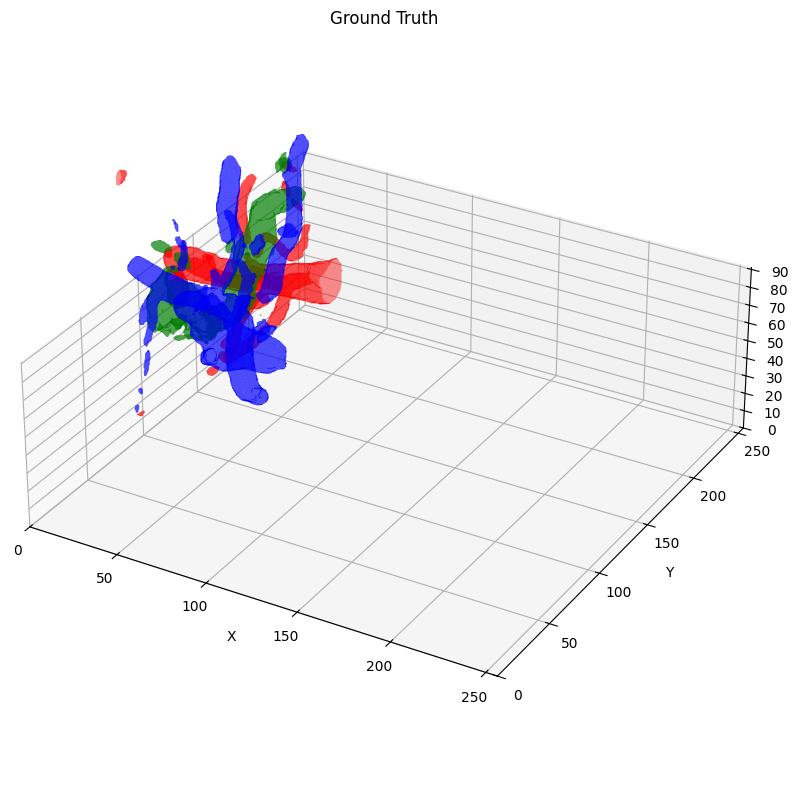

In [88]:
plot_segmentation_3d_v2(pred_3d, title="Ground Truth", spacing=(1.0, 0.75, 0.75))